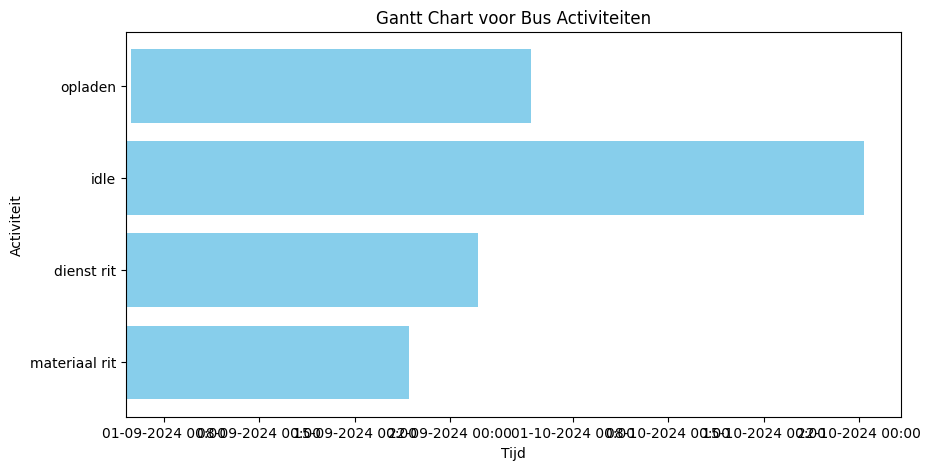

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df1 = pd.read_excel('omloopplanning.xlsx', engine='openpyxl')
df1['starttijd datum'] = pd.to_datetime(df1['starttijd datum'])
df1['eindtijd datum'] = pd.to_datetime(df1['eindtijd datum'])
df1['duur'] = df1['eindtijd datum'] - df1['starttijd datum']

fig, ax = plt.subplots(figsize=(10, 5))

for i, row in df1.iterrows():
    ax.barh(row['activiteit'], row['duur'].total_seconds() / 60, left=row['starttijd datum'], color='skyblue')

# Stel de x-as als datum/tijd in
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M'))


# Labels en titel
plt.xlabel('Tijd')
plt.ylabel('Activiteit')
plt.title('Gantt Chart voor Bus Activiteiten')

plt.show()

In [23]:
df1.head()

,Unnamed: 0,startlocatie,eindlocatie,starttijd,eindtijd,activiteit,buslijn,energieverbruik,starttijd datum,eindtijd datum,omloop nummer,duur
0,0,ehvgar,ehvbst,05:03:00,05:07:00,materiaal rit,NaN,1.9800,2024-08-29 05:03:00,2024-08-29 05:07:00,1,0 days 00:04:00
1,1,ehvbst,ehvapt,05:07:00,05:31:00,dienst rit,401.0,10.8036,2024-08-29 05:07:00,2024-08-29 05:31:00,1,0 days 00:24:00
2,2,ehvapt,ehvapt,05:31:00,06:04:00,idle,NaN,0.0100,2024-08-29 05:31:00,2024-08-29 06:04:00,1,0 days 00:33:00
3,3,ehvapt,ehvbst,06:04:00,06:29:00,dienst rit,401.0,10.8600,2024-08-29 06:04:00,2024-08-29 06:29:00,1,0 days 00:25:00
4,4,ehvbst,ehvbst,06:29:00,06:31:00,idle,NaN,0.0100,2024-08-29 06:29:00,2024-08-29 06:31:00,1,0 days 00:02:00
